In [1]:
#data:kaggle competitions download -c google-quest-challenge
%ls

������ C �еľ��� Local Disk
 �������к��� 025D-76D5

 c:\Users\rukam\source\repos\FLIP01\Code ��Ŀ¼

2020/01/14  23:02    <DIR>          .
2020/01/14  23:02    <DIR>          ..
2020/01/06  20:27                 0 project.ipynb
2020/01/07  15:38         4,154,855 start-from-here-quest-complete-eda-fe.ipynb
2020/01/14  23:17             4,921 ti.ipynb
               3 ���ļ�      4,159,776 �ֽ�
               2 ��Ŀ¼ 31,974,793,216 �����ֽ�


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def get_entropy(df, round_val=3):
    result = []
    for col in df.columns:
        data = df[col].value_counts(normalize=True)
        result.append(round(stats.entropy(data, base=2), round_val))
    return result
def get_summary(df, cols=None):
    summary = pd.DataFrame()
    vcs = pd.DataFrame()
    if cols == None:
        cols = df.columns.values
    summary['Name'] = cols
    summary['dtype'] = df[cols].dtypes.values
    summary['Unique'] = df[cols].nunique().values
    summary['Missing'] = df[cols].isnull().sum().values
    summary['Mode'] = df[cols].mode().iloc[0].values
    summary['Mode Freq'] = df[cols].apply(lambda ser:pd.value_counts(ser, normalize=True).values[0]).values
    summary['Entropy'] = get_entropy(df[cols])
    return summary

In [ ]:
train_set = pd.read_csv('Data/train.csv')
test_set =  pd.read_csv('Data/test.csv')
submmistion=pd.read_csv('Data/sample_submission.csv')

In [5]:
train_set = pd.read_csv('../Data/train.csv')
test_set =  pd.read_csv('../Data/test.csv')
submmistion=pd.read_csv('../Data/sample_submission.csv')

In [13]:
data_cols = train_set.columns[:11]
target_cols = train_set.columns[11:]

In [14]:
data_cols

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host'],
      dtype='object')

In [20]:
summary_data = get_summary(train_set[data_cols])
summary_data

,Name,dtype,Unique,Missing,Mode,Mode Freq,Entropy
0,qa_id,int64,6079,0,0,0.000165,12.570
1,question_title,object,3583,0,What is the best introductory Bayesian statist...,0.001974,11.641
2,question_body,object,3583,0,Which is the best introductory textbook for Ba...,0.001974,11.641
3,question_user_name,object,3215,0,Mike,0.002468,11.420
4,question_user_page,object,3422,0,https://stats.stackexchange.com/users/5,0.001974,11.557
5,answer,object,6079,0,\n\nPrint it and give it to your teacher. Or s...,0.000165,12.570
6,answer_user_name,object,4114,0,Scott,0.003290,11.678
7,answer_user_page,object,4430,0,https://tex.stackexchange.com/users/4427,0.002797,11.846
8,url,object,3583,0,http://stats.stackexchange.com/questions/125/w...,0.001974,11.641
9,category,object,5,0,TECHNOLOGY,0.401546,2.144


In [26]:
summary_target = get_summary(train_set[target_cols])
s_summary_target = summary_target.sort_values('Unique',ascending=False)
s_summary_target

,Name,dtype,Unique,Missing,Mode,Mode Freq,Entropy
25,answer_satisfaction,float64,17,0,1.000000,0.207600,2.998
0,question_asker_intent_understanding,float64,9,0,1.000000,0.466031,2.020
1,question_body_critical,float64,9,0,0.333333,0.247738,2.839
24,answer_relevance,float64,9,0,1.000000,0.808192,1.027
23,answer_plausible,float64,9,0,1.000000,0.774798,1.182
22,answer_level_of_information,float64,9,0,0.666667,0.676756,1.782
21,answer_helpful,float64,9,0,1.000000,0.608817,1.719
20,question_well_written,float64,9,0,1.000000,0.266327,2.659
29,answer_well_written,float64,9,0,1.000000,0.433295,1.867
7,question_interestingness_self,float64,9,0,0.333333,0.349400,2.559


In [28]:
s_summary_target.index

Int64Index([25,  0,  1, 24, 23, 22, 21, 20, 29,  7,  6,  9, 28, 27, 26,  2,  3,
             4,  5, 15, 10, 18, 17, 16,  8, 14, 13, 12, 11, 19],
           dtype='int64')

目标们最多有17个值，最少只有3个。画画分布图看看：

In [38]:
print(s_summary_target['Unique'][25])
print(summary_target['Unique'][25])

17
17


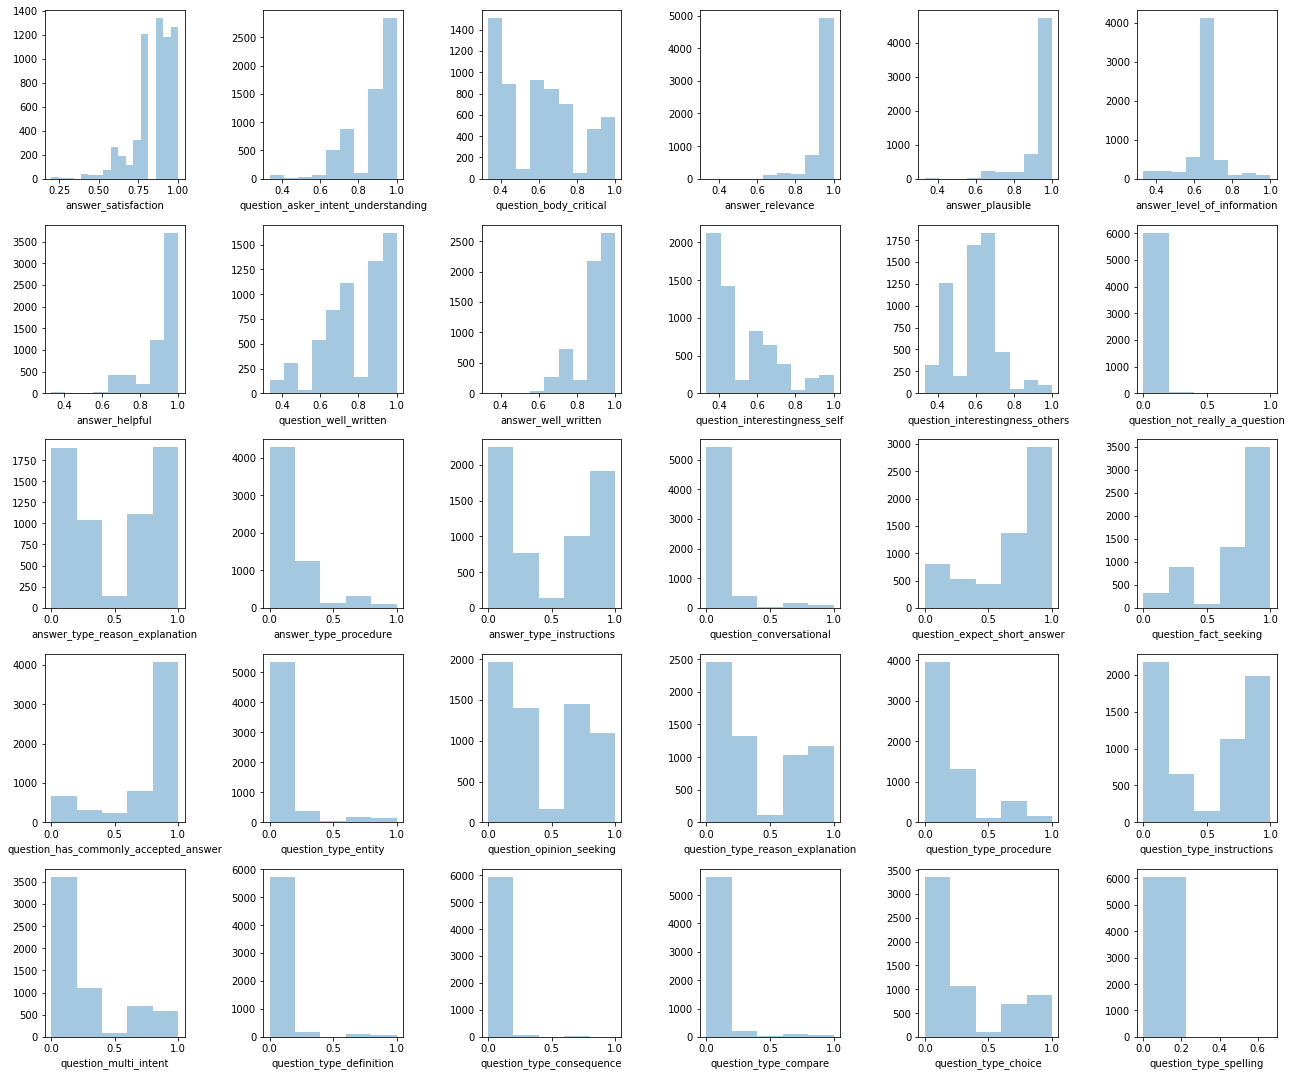

In [43]:
fig, axes = plt.subplots(5,6, figsize=(18, 15))
axes = axes.ravel()
sorted_index = s_summary_target.index
for i in range(len(target_cols)):
    col = target_cols[sorted_index[i]]
    bins = summary_target['Unique'][sorted_index[i]]
    ax = axes[i]
    #print(str.format('({},{},{})',i,col,len(bins)))
    sns.distplot(train_set[col], label=col, kde=False, bins=bins, ax=ax)
    # ax.set_title(col)
    #ax.set_xlim([0, 1])
    #ax.set_ylim([0, 6079])
plt.tight_layout()
plt.show()
plt.close()